[-1.542096785031113, -2.17608087921559, -1.9560008899737769, -0.9041682080424189, 0.017882565956449326, 0.5699435581602657, 1.142669453589662, 0.8677245871733066, 0.922886862748193, -0.7091656020946948, 0.6090505390452177, 0.6416990869879478, 0.2056803967544673, -0.9508939448118725, 1.289334877691561, 1.3820373661960839, 0.5078231633027743, -0.04243363506554387, 0.12591753488603588, 0.07818014443681781, 0.6905366236539738, -0.08783202639852972, 0.9508168193063808, 0.15709306815630208, 0.3778920193987386, 0.5739878734280122, 0.5209054052194424, -0.8903067782289715, 0.7444172080782758, 0.8218612678958486, 1.3422059672114826, 1.0019347190899033, 1.111212463315786, 0.028412947049414106, -0.32525904535313405, -1.93755194946259, -0.862328833411965, 0.5633544980587701, -0.9086491807516011, -1.3084576825478291, -1.8749789634979717, -1.3774313977003252, -1.3749404719183582, -0.7567241466079441, -0.9083765889560973, -0.9950468361967112, -1.2760014352971407, -1.2164199186685203, -0.57034320581753

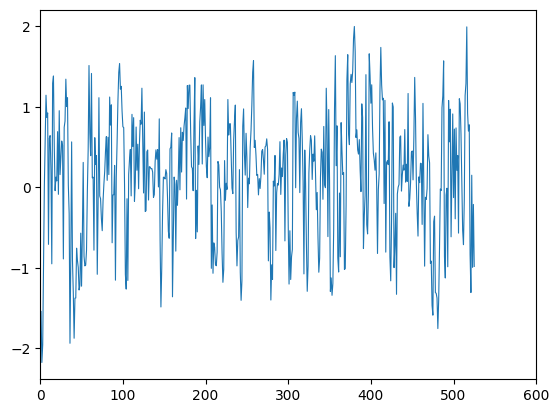

In [2]:
import numpy as np
import matplotlib.pyplot as plt
nchain=[]                            
achain=[]                           # Like the input val
posteriorchain=[]                   # the output values...
a0=-2                                # initial value
s=1000                                # no of steps
burnout_t=0                     # Burnout_time
t=0
def targetdistri(x):                    # Basically a function f(x)
  probX = np.exp(-x**2) * (2 + np.sin(x*5) + np.sin(x*2))
  return probX
    
for i in range(1,s):
  anew= a0+np.random.normal(0,1)       # variance of random?
  alpha = targetdistri(anew) / targetdistri(a0)
  u=np.random.uniform(0,1)

  if alpha>=u:
    t=t+1
    if t>=burnout_t:
      nchain.append(t)
      achain.append(anew)
      posteriorchain.append(targetdistri(anew))
    a0=anew
  #else:
    #a0=a0
print(achain)
print("length of achain",len(achain),"nchain = ", len(nchain))
plt.plot(nchain,achain, lw=0.8)

plt.xlim(0,600)
plt.show()

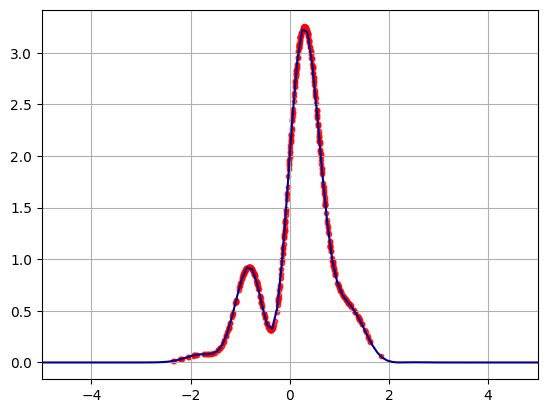

In [20]:
for i in range(0,len(achain)):
  plt.scatter(achain[i],posteriorchain[i],color='red',alpha=0.7,s=10)
x=np.linspace(-5,5,100)
y= targetdistri(x)
plt.xlim(-5,5)
plt.plot(x,y,color='darkblue')        # actual function graph. (x,y) pair
plt.grid()

[]

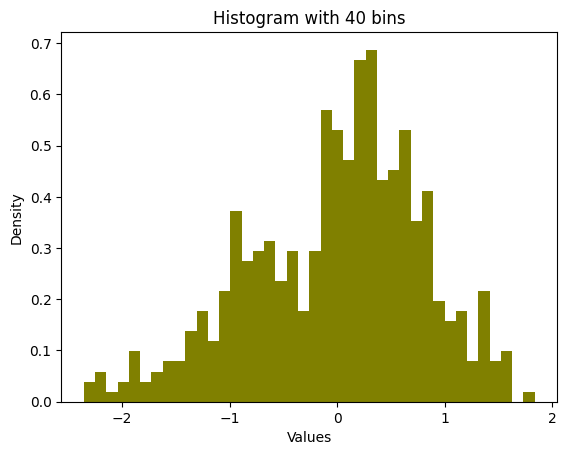

In [21]:
# Histogram
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram with 40 bins')
plt.hist(achain, bins=40, density=True, color='olive')       # freq. of output?
plt.plot()

#Data

/tmp/ipykernel_1068/3561367524.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(z, H_z, shz, fmt='.k', color='blue',ecolor='red',elinewidth=0.5,  capsize=3 ,label='Hubble data; z v/s H(z)')


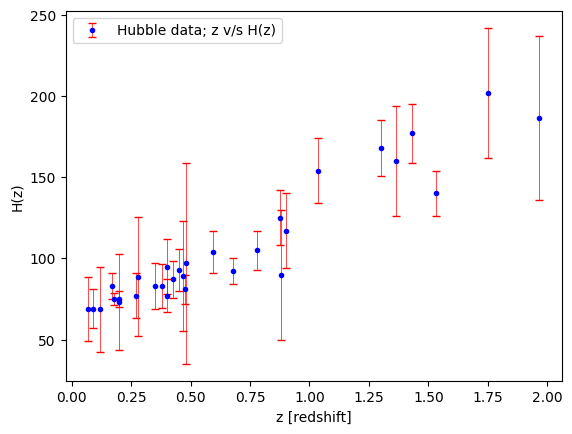

In [8]:
# data
import matplotlib.pyplot as plt
z=np.array([0.07  , 0.09  , 0.12  , 0.17  , 0.179 , 0.199 , 0.2   , 0.27  ,
       0.28  , 0.352 , 0.3802, 0.4   , 0.4004, 0.4247, 0.4497, 0.47  ,
       0.4783, 0.48  , 0.5929, 0.6797, 0.7812, 0.8754, 0.88  , 0.9   ,
       1.037 , 1.3   , 1.363 , 1.43  , 1.53  , 1.75  , 1.965 ])
H_z= np.array([ 69. ,  69. ,  68.6,  83. ,  75. ,  75. ,  72.9,  77. ,  88.8,
        83. ,  83. ,  95. ,  77. ,  87.1,  92.8,  89. ,  80.9,  97. ,
       104. ,  92. , 105. , 125. ,  90. , 117. , 154. , 168. , 160. ,
       177. , 140. , 202. , 186.5])
shz =np.array([19.6, 12. , 26.2,  8. ,  4. ,  5. , 29.6, 14. , 36.6, 14. , 13.5,
       17. , 10.2, 11.2, 12.9, 34. ,  9. , 62. , 13. ,  8. , 12. , 17. ,
       40. , 23. , 20. , 17. , 33.6, 18. , 14. , 40. , 50.4])
# Plotting error bar
plt.errorbar(z, H_z, shz, fmt='.k', color='blue',ecolor='red',elinewidth=0.5,  capsize=3 ,label='Hubble data; z v/s H(z)')
plt.xlabel("z [redshift]")
plt.ylabel("H(z)")
plt.legend(loc="upper left")
plt.show()

In [9]:
def ln_likelihood(z,H_z,shz,h0,om_mass):
  n=len(z)
  sum=0
  for i in range(0,n):            # calculating chi^2 => summation [W_i *(y_obsrvd - y_theore)^2]
    sum= sum+ (H_z[i]-h0*(om_mass*(1+z[i])**3+(1-om_mass))**0.5)**2/(shz[i])**2
  return -(1/2)*(sum)             # as ln(L)= -X^2/2 + c

Text(0.5, 1.0, '')

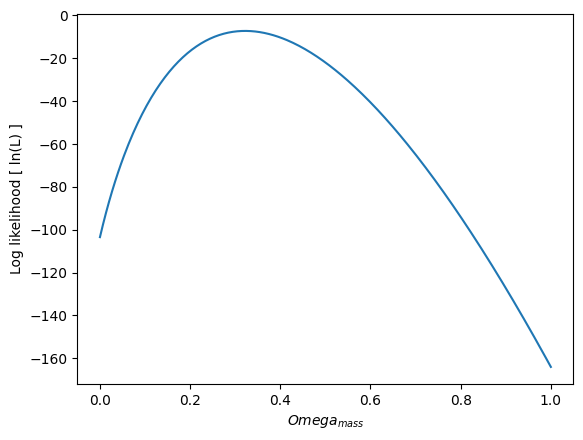

In [14]:
a= np.linspace(0,1,300)                    # om_mass, i.e. omega mass
pp= ln_likelihood(z, H_z, shz, 68, a)         # H0= 68
plt.plot(a,pp )
plt.xlabel('$Omega_{mass}$')
plt.ylabel('Log likelihood [ ln(L) ]')
plt.title('')

In [22]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
a = np.linspace(50, 100, 1000)
b = np.linspace(0, 1, 100)

X, Y = np.meshgrid(a, b)
Z = ln_likelihood(z,H_z,shz,X,Y)       # H0=X;  OmegaMass=Y
z_data = pd.DataFrame(Z)


fig = go.Figure(data=[go.Surface(z=z_data.values,x=a,y=b)])
fig.update_traces(contours_z=dict( show=True,usecolormap=True,highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Log Posterior', 
                autosize=False,
                scene_camera_eye=dict(x=1, y=3, z=-0.64),
                width=600, height=600,
                margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [ ]:
def ln_prior(h0, om):
    # Gaussian priors: h0 ~ N(70,3), om ~ N(0.3,0.1)
    h0_prior = -((h0 - 70)**2) / (2 * 3**2)
    om_prior = -((om - 0.3)**2) / (2 * 0.1**2)
    return h0_prior + om_prior

def ln_posterior(theta, z, H_z, shz):
    h0, om = theta
    # Prior
    if not np.isfinite(ln_prior(h0, om)):
        return -np.inf  # Reject unphysical prior values
    # ln(Prior) + ln(Likelihood) = ln(Posterior)
    return ln_prior(h0, om) + ln_likelihood(z, H_z, shz, h0, om)




In [28]:
import emcee
import numpy as np
# ---- MCMC SETUP ----
ndim = 2           # Two parameters: h0 and om
nwalkers = 20      # Number of independent chains ("walkers")
nsteps = 5000      # Steps each walker takes
burnin = 1000      # Discard these initial steps (they're still "warming up")

# ---- INITIAL GUESS FOR WALKERS ----
np.random.seed(42)
initial_guess = [70, 0.3]  # Rough center of prior
pos = initial_guess + 1e-2 * np.random.randn(nwalkers, ndim)   # noise added

# ---- RUN THE MCMC ----

sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=(z, H_z, shz))   #sampler object
# Actually run the chains
sampler.run_mcmc(pos, nsteps, progress=False)
print("Sampler finished. Samples shape:", sampler.get_chain().shape)


# ---- EXTRACT SAMPLES ----

samples = sampler.get_chain(discard=burnin, flat=True)    # Discard burn-in steps, flatten chains into one big array
h0_samples = samples[:, 0]  # All sampled values of h0
om_samples = samples[:, 1]  # All sampled values of om

# ---- SUMMARIZE RESULTS ----
h0_mean = np.mean(h0_samples)
h0_std = np.std(h0_samples)
om_mean = np.mean(om_samples)
om_std = np.std(om_samples)
print(len(samples), type(samples), len(h0_samples), type(h0_samples))
print(f"H₀ = {h0_mean:.3f} ± {h0_std:.3f}")
print(f"Ωₘ = {om_mean:.3f} ± {om_std:.3f}")


Sampler finished. Samples shape: (5000, 20, 2)
80000 <class 'numpy.ndarray'> 80000 <class 'numpy.ndarray'>
H₀ = 69.019 ± 2.056
Ωₘ = 0.307 ± 0.041


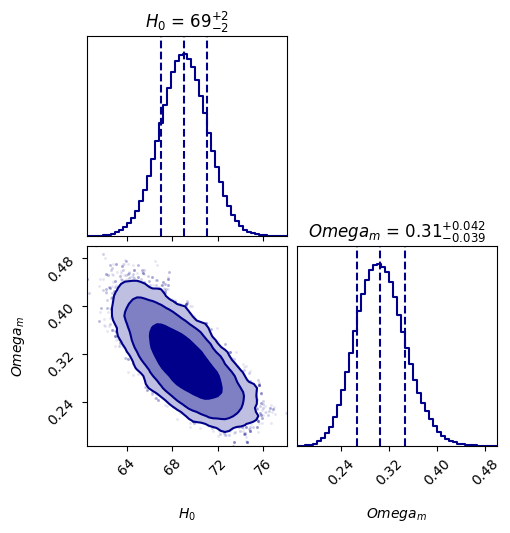

In [36]:
import corner 
fig = corner.corner(samples,bins=50,labels=["$H_0$","$Omega_m$"],
                    color="darkblue",
                    quantiles=[0.16, 0.5, 0.84],                     # default value
                    plot_contours=True,
                    fill_contours=True,
                    levels=(0.68,0.95,0.99,),
                    plot_datapoints=True,
                    smooth=True, smooth1d=True,
                    title_fmt=".2g",                    # .2f  or  .2g
                    show_titles=True
                    #,divergences=True
                    )

In [37]:
import numpy as np
from functools import partial
nchain=[]
achain=[]
bchain=[]
posteriorchain=[]
a0=70
b0=0.3                                 # initial value
s=500000                             # no of steps
burnout_time= 1000                    # Burnout_time
t=0
ln_post = partial(ln_posterior, z=z, H_z=H_z, shz=shz)    # z, H_z, shz VALUE given


In [40]:
# WITHOUT EMCEE
for i in range(1,s):
  anew= a0+np.random.normal(0,1)
  bnew= b0+np.random.normal(0,0.1)
  u=np.random.uniform(0,1)
  alpha= np.exp(ln_post([anew,bnew])- ln_post([a0, b0]))  # alpha= P(new)/P()

  if ln_post([anew,bnew])> ln_post([a0, b0]):            # i.e. alpha>1 
    t=t+1
    if t>=burnout_time:
      nchain.append(t)
      achain.append(anew)
      bchain.append(bnew)
      posteriorchain.append(ln_post([a0, b0]))
    a0=anew
    b0=bnew

  elif alpha >= u:
    t=t+1
    if t>=burnout_time:
      nchain.append(t)
      achain.append(anew)
      bchain.append(bnew)
      posteriorchain.append(ln_post([a0, b0]))
    a0=anew
    b0=bnew

  else:
    a0=a0
    b0=b0

ar= t/s
print("acceptance ratio=",ar)

/tmp/ipykernel_1068/669014050.py:5: RuntimeWarning:

invalid value encountered in scalar power



acceptance ratio= 0.897614


68.93074238595986 2.018317616120665


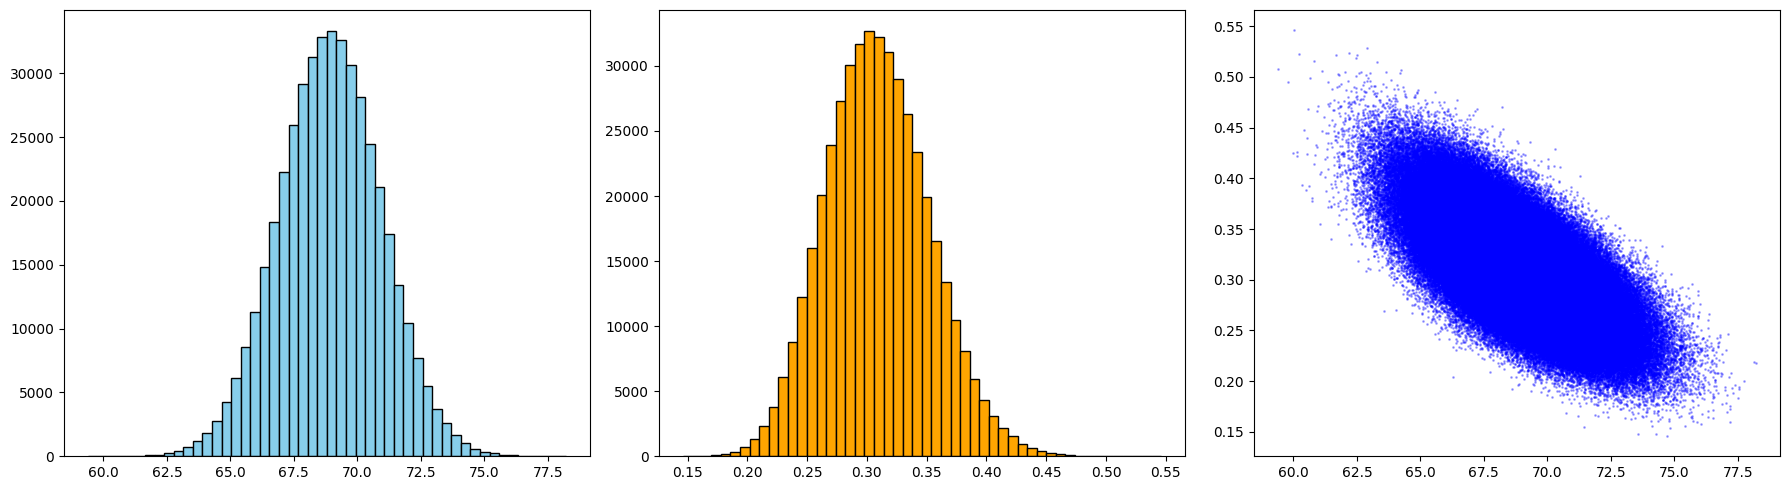

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].hist(achain, bins=50, color='skyblue', edgecolor='black')
axs[1].hist(bchain, bins=50, color='orange', edgecolor='black')
axs[2].scatter(achain, bchain, s=1,alpha=0.3,  color='blue')
print(np.mean(achain), np.std(achain) )
plt.tight_layout()
plt.show()

In [ ]:
a = np.linspace(50, 100, 1000)
b = np.linspace(0, 1, 100)

X, Y = np.meshgrid(a, b)
Z = ln_likelihood(z,H_z,shz,X,Y)       # H0=X;  OmegaMass=Y
z_data = pd.DataFrame(Z)


fig = go.Figure(data=[go.Surface(z=z_data.values,x=a,y=b)])
#fig.update_traces(contours_z=dict(show=True, usecolormap=True,highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Log Posterior', 
                autosize=False,
                scene_camera_eye=dict(x=1, y=3, z=-0.64),
                width=500, height=500,
                margin=dict(l=65, r=50, b=65, t=90)
                )
fig.show()

In [39]:
# slight changes
for i in range(1,s):
  anew= a0+np.random.normal(0,1)
  bnew= b0+np.random.normal(0,0.1)
  u=np.random.uniform(0,1)
  alpha= np.exp(ln_post([anew,bnew])- ln_post([a0, b0]))   # alpha= P(new)/P()

  if alpha >= u:
    t=t+1
    if t>=burnout_time:
      nchain.append(t)
      achain.append(anew)
      bchain.append(bnew)
      posteriorchain.append(ln_post([a0, b0]))
    a0=anew
    b0=bnew

ar= t/s
print(np.mean(achain), np.std(achain))
print("acceptance ratio=",ar)


/tmp/ipykernel_1068/669014050.py:5: RuntimeWarning:

invalid value encountered in scalar power



68.92218414405937 2.0089132078536296
acceptance ratio= 0.598786
